In [224]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset
dataset_path = 'hyperparameter_results.csv'  # Adjust the path to your dataset
df = pd.read_csv(dataset_path)

import pandas as pd

# Load the CSV file into a DataFrame

# Check for columns with None values
columns_with_none = df.columns[df.isnull().any()].tolist()

if len(columns_with_none) > 0:
    print("Columns with None values:")
    for column in columns_with_none:
        print(column)
else:
    print("No columns with None values.")

#Filling the none values
df.fillna("none", inplace=True)
# Replace 'scale' with 0 and 'auto' with 1 in the 'gamma' column
df['gamma'] = df['gamma'].replace({'scale': 0, 'auto': 1})





Columns with None values:
class_weight


In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np



# Manually specify the categorical features to be encoded
categorical_features = ['class_weight','kernel']
remaining_features = [col for col in df.columns if col not in categorical_features + ['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Encoding categorical variables
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(df[categorical_features])
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)

# Combine encoded features with the rest of the dataset
encoded_df = pd.DataFrame(encoded_categorical, columns=encoded_feature_names)
remaining_df = df[remaining_features]
target_df = df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

full_df = pd.concat([encoded_df, remaining_df.reset_index(drop=True), target_df.reset_index(drop=True)], axis=1)

# Splitting dataset into features (X) and targets (y)
X = full_df.drop(['Accuracy', 'Precision', 'Recall', 'F1-Score'], axis=1)
y = full_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the preprocessed data to a CSV file
preprocessed_data_path = 'C:\\Users\\MIN\\Documents\\FYP\\preprocessed_data.csv'  # Adjust the path to where you want to save the preprocessed data
full_df.to_csv(preprocessed_data_path, index=False)


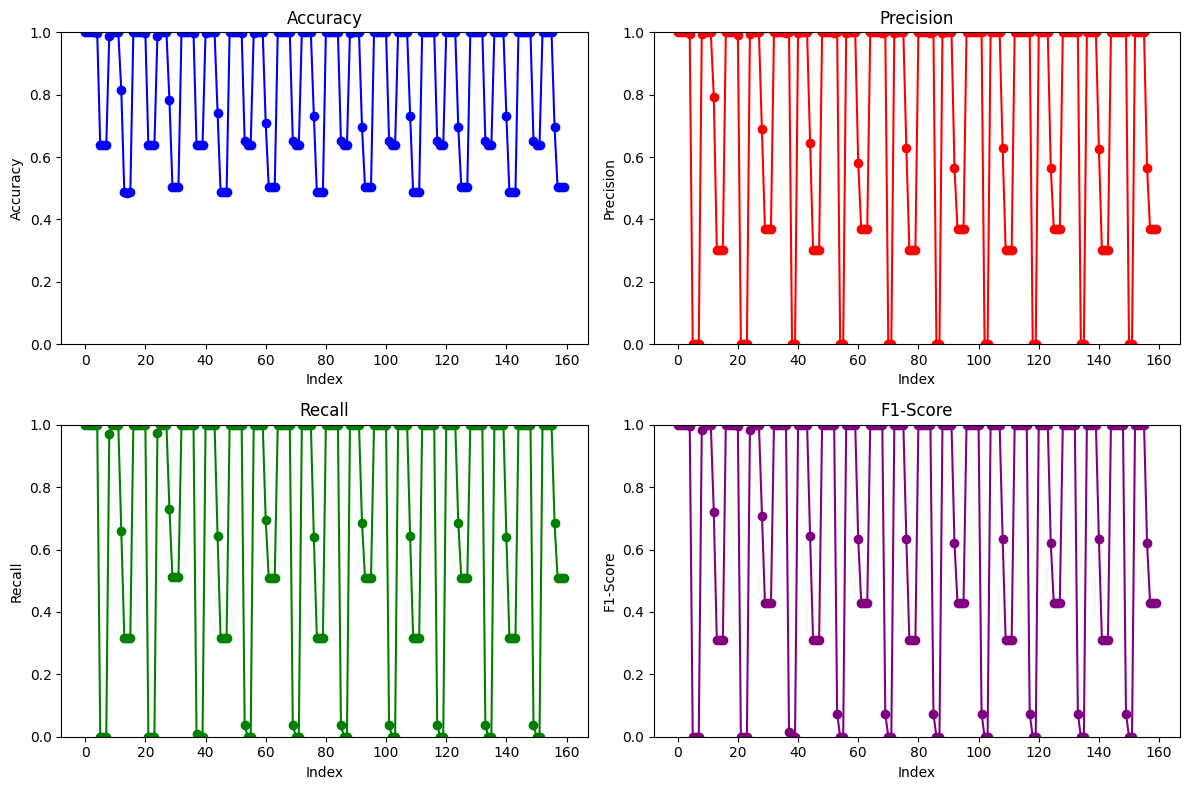

In [252]:
import matplotlib.pyplot as plt

# Create subplots for Accuracy, Precision, Recall, and F1-Score
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Line plot for Accuracy
axs[0, 0].plot(df.index, df['Accuracy'], marker='o', color='b')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0, 1)  # Set y-axis range from 0 to 1

# Line plot for Precision
axs[0, 1].plot(df.index, df['Precision'], marker='o', color='r')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim(0, 1)  # Set y-axis range from 0 to 1

# Line plot for Recall
axs[1, 0].plot(df.index, df['Recall'], marker='o', color='g')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim(0, 1)  # Set y-axis range from 0 to 1

# Line plot for F1-Score
axs[1, 1].plot(df.index, df['F1-Score'], marker='o', color='purple')
axs[1, 1].set_title('F1-Score')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].set_ylim(0, 1)  # Set y-axis range from 0 to 1

# Adjust layout
plt.tight_layout()
plt.show()


In [205]:
#If-Else added
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('preprocessed_data.csv')

# Assuming the dataset structure matches the expected format
X = data.drop(['Accuracy', 'Precision', 'Recall', 'F1-Score'], axis=1)
y = data[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the ANN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(4, activation='sigmoid')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/200
4/4 [==============================] - 2s 80ms/step - loss: 0.1822 - mae: 0.3806 - val_loss: 0.1502 - val_mae: 0.3476
Epoch 2/200
4/4 [==============================] - 0s 27ms/step - loss: 0.1604 - mae: 0.3561 - val_loss: 0.1310 - val_mae: 0.3286
Epoch 3/200
4/4 [==============================] - 0s 29ms/step - loss: 0.1479 - mae: 0.3446 - val_loss: 0.1175 - val_mae: 0.3128
Epoch 4/200
4/4 [==============================] - 0s 21ms/step - loss: 0.1379 - mae: 0.3335 - val_loss: 0.1102 - val_mae: 0.3053
Epoch 5/200
4/4 [==============================] - 0s 25ms/step - loss: 0.1336 - mae: 0.3287 - val_loss: 0.1066 - val_mae: 0.3002
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 0.1325 - mae: 0.3260 - val_loss: 0.1044 - val_mae: 0.2963
Epoch 7/200
4/4 [==============================] - 0s 26ms/step - loss: 0.1319 - mae: 0.3235 - val_loss: 0.1035 - val_mae: 0.2945
Epoch 8/200
4/4 [==============================] - 0s 17ms/step - loss: 0.1319 - mae: 0.32

In [209]:
# Interactive Hyperparameter Input
def get_user_input(scaler):
    inputs = {}
    kernel_input = input("Enter kernel (linear/rbf/poly/sigmoid): ")
    if kernel_input in ['linear', 'rbf', 'poly', 'sigmoid']:
        inputs['kernel'] = kernel_input
    else:
        raise ValueError("Invalid value for kernel. It must be 'linear', 'rbf', 'poly', or 'sigmoid'.")
    
    class_weight_input = input("Enter class_weight (None/balanced): ")
    if class_weight_input in ['none', 'balanced']:
        inputs['class_weight'] = class_weight_input
    else:
        raise ValueError("Invalid value for class_weight. It must be 'None' or 'Balanced'.")
    
    C_input = input("Enter C (float value like 1.0/10.0/100.0): ")
    if C_input.replace('.', '', 1).isdigit():
        inputs['C'] = float(C_input)
    else:
        raise ValueError("C must be a float.")
    
    gamma_input = input("Enter gamma (scale == 0/auto == 1 or a float >=1): ")
    if gamma_input.isdigit():
        gamma = float(gamma_input)
    elif gamma_input == 'scale':
        gamma = 0
    elif gamma_input == 'auto':
        gamma = 1
    else:
        try:
            gamma = float(gamma_input)
            if gamma >= 0:
                pass
            else:
                raise ValueError
        except ValueError:
            raise ValueError("gamma must be 'scale', 'auto', or a float >= 1")
    
    inputs['gamma'] = gamma

    input_df = pd.DataFrame([inputs])
    input_df = pd.get_dummies(input_df)
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[X.columns]
    input_scaled = scaler.transform(input_df)
    return input_scaled

# Prediction
user_input_scaled = get_user_input(scaler)
predicted_metrics = model.predict(user_input_scaled)
print(f"Predicted Performance Metrics: Accuracy={predicted_metrics[0][0]}, Precision={predicted_metrics[0][1]}, Recall={predicted_metrics[0][2]}, F1-Score={predicted_metrics[0][3]}")


1/1 [==============================] - 0s 31ms/step
Predicted Performance Metrics: Accuracy=0.6335892081260681, Precision=0.4019481837749481, Recall=0.14910799264907837, F1-Score=0.14581087231636047


1/1 [==============================] - 0s 47ms/step


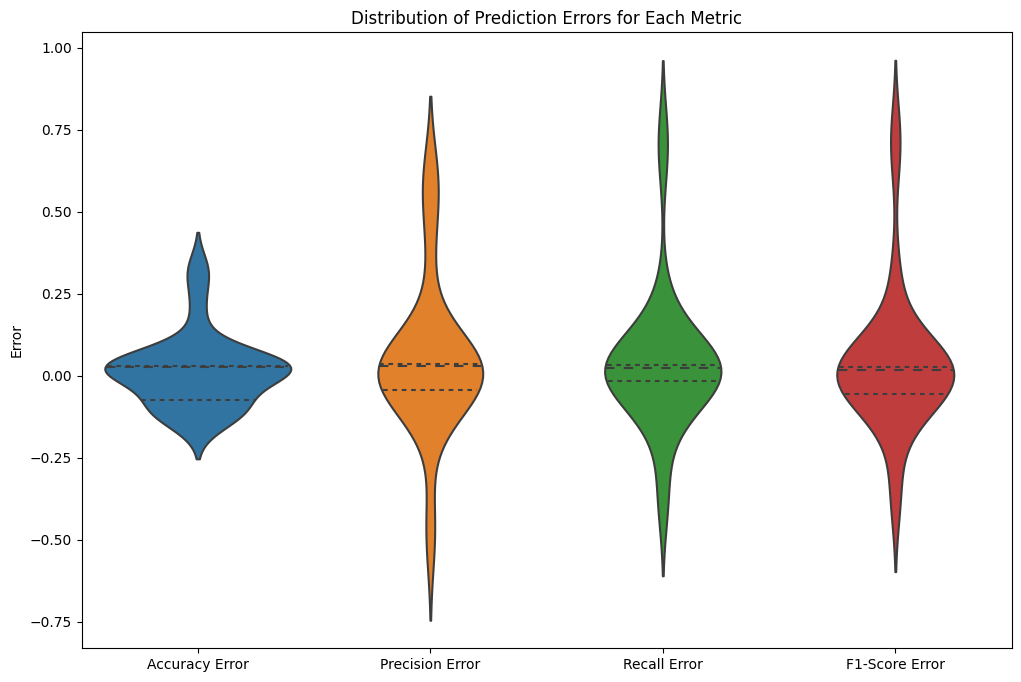

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate predictions
# Note: Ensure your input data is scaled if your model was trained on scaled data
predicted_values = model.predict(X_test_scaled)

# Step 2: Calculate errors for each metric
# Assuming y_test is a DataFrame with the same structure as the model's output
errors = y_test.to_numpy() - predicted_values

# Creating a DataFrame for easier manipulation
errors_df = pd.DataFrame(errors, columns=['Accuracy Error', 'Precision Error', 'Recall Error', 'F1-Score Error'])

# Step 3: Violin plot for visualization of errors
plt.figure(figsize=(12, 8))
sns.violinplot(data=errors_df, inner="quartile")
plt.title('Distribution of Prediction Errors for Each Metric')
plt.ylabel('Error')
plt.show()
